In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [6]:
IMG_DIR = "./photos"

def show_img(img, name):
    rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imsave(os.path.join(IMG_DIR, name), rgb_img)

In [7]:
sign = cv.imread("interzis-bicicletelor.png")
show_img(sign, "0-template.png")

In [8]:
# computes the positions of the highest, lowest leftest and rightest points
def get_black_extremes(mat):
    black_mask = np.all(mat == [0, 0, 0], axis=-1)
    black_coords = np.column_stack(np.where(black_mask))

    y_coords = black_coords[:, 0]
    x_coords = black_coords[:, 1]

    return(np.min(y_coords), np.max(y_coords), np.min(x_coords), np.max(x_coords))

In [10]:
# spin sign around

tops = []
bottoms = []
lefts = []
rights = []

(h, w) = sign.shape[:2]  
scale = 1.0

center = (w // 2, h // 2)
for angle in range(360):
    M = cv.getRotationMatrix2D(center, angle, scale)
    rot_img = sign.copy()
    rotated = cv.warpAffine(
        rot_img, M, (w, h),
        flags=cv.INTER_LINEAR,
        borderMode=cv.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # White background
    )
    top, bottom, left, right = get_black_extremes(rotated)
    tops.append(top)
    bottoms.append(bottom)
    lefts.append(left)
    rights.append(right)

    if (angle == 83):
        show_img(rotated, "1-rotated.png")


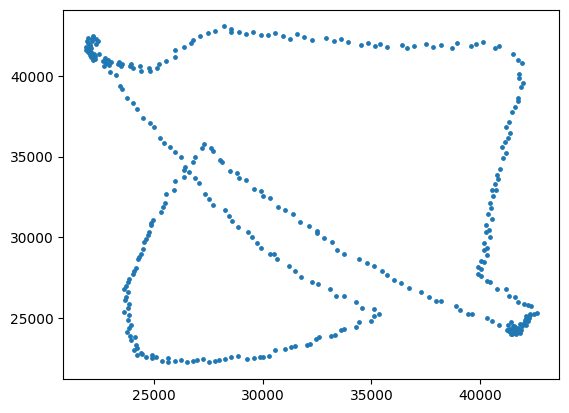

In [12]:
# visualise how x and y can be used to characterise angle

a = [i * j for i, j in zip(lefts, rights)]
b = [i * j for i, j in zip(tops, bottoms)]
plt.scatter(a, b, s=6)
plt.savefig(os.path.join(IMG_DIR, "2-figure-extremities-relations"))

In [13]:
# show the common angle 
# gets 4 vectors containing angles and return the common angle between them
def get_common_angle(tops, bottoms, lefts, rights):
    for i in bottoms:
        if i in tops and i in lefts and i in rights:
            return i 

    return -1 

In [14]:
# testing for every angle: spin the image and try to predict the rotation using previously learned positions of 
# highest, lowest, leftest and rightest black point in the image

(h, w) = sign.shape[:2]  
scale = 1.0
center = (w // 2, h // 2)

top_lens = 0
bottom_lens = 0
left_lens = 0
right_lens = 0
max_right_len = 0
min_right_len = 122
 
for angle in range(360 * 3):
    # angle = 112
    angle = angle / 3

    M = cv.getRotationMatrix2D(center, angle, scale)
    rot_img = sign.copy()

    test_img = cv.warpAffine(
        rot_img, M, (w, h),
        flags=cv.INTER_LINEAR,
        borderMode=cv.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # White background
    )

    top, bottom, left, right = get_black_extremes(test_img)

    eps = 1
    cl_top = [int(idx) for i, idx in zip(tops, np.linspace(0, len(tops) - 1, len(tops))) if abs(i-top) < eps]
    cl_bottom = [int(idx) for i, idx in zip(bottoms, np.linspace(0, len(bottoms) - 1, len(bottoms))) if abs(i-bottom) < eps]
    cl_left = [int(idx) for i, idx in zip(lefts, np.linspace(0, len(lefts) - 1, len(lefts))) if abs(i-left) < eps]
    cl_right = [int(idx) for i, idx in zip(rights, np.linspace(0, len(rights) - 1, len(rights))) if abs(i-right) < eps]


    computed_angle = get_common_angle(cl_top, cl_bottom, cl_left, cl_right)
    while computed_angle == -1:
        computed_angle = get_common_angle(cl_top, cl_bottom, cl_left, cl_right)
        eps += 1

        cl_top = [int(idx) for i, idx in zip(tops, np.linspace(0, len(tops) - 1, len(tops))) if abs(i-top) < eps]
        cl_bottom = [int(idx) for i, idx in zip(bottoms, np.linspace(0, len(bottoms) - 1, len(bottoms))) if abs(i-bottom) < eps]
        cl_left = [int(idx) for i, idx in zip(lefts, np.linspace(0, len(lefts) - 1, len(lefts))) if abs(i-left) < eps]
        cl_right = [int(idx) for i, idx in zip(rights, np.linspace(0, len(rights) - 1, len(rights))) if abs(i-right) < eps]

    top_lens += len(cl_top)
    bottom_lens += len(cl_bottom)
    left_lens += len(cl_left)
    right_lens += len(cl_right)
    if(len(cl_right) > max_right_len):
        max_right_len = len(cl_right)

    if(len(cl_right) < min_right_len):
        min_right_len = len(cl_right)

    # print(cl_top)
    # print(cl_bottom)
    # print(cl_left)
    # print(cl_right)
    angle_eps = 1
    if computed_angle < round(angle) - eps or computed_angle > round(angle) + eps:
        print("(", computed_angle, " ", angle, ")", end=", ")


print()
print("in medie, cei mai scurti vectori vor fi:")
print("top, bottom, left, right")
print(top_lens, bottom_lens, left_lens, right_lens)
print("biggest right vector:", max_right_len)
print("smallest right vector:", min_right_len)

( 1   358.3333333333333 ), ( 0   359.3333333333333 ), ( 0   359.6666666666667 ), 
in medie, cei mai scurti vectori vor fi:
top, bottom, left, right
17451 17451 17464 17463
biggest right vector: 55
smallest right vector: 1


In [9]:
# different method, where i just get the leftest and rightest point and get the angle between them 

In [16]:
def spin_img(img, angle):
    (h, w) = sign.shape[:2]  
    scale = 1.0
    center = (w // 2, h // 2)

    M = cv.getRotationMatrix2D(center, angle, scale)
    rot_img = img.copy()

    rot_img = cv.warpAffine(
        rot_img, M, (w, h),
        flags=cv.INTER_LINEAR,
        borderMode=cv.BORDER_CONSTANT,
        borderValue=(0, 255, 0)  # White background
    )

    return rot_img

show_img(spin_img(sign, -40), "3-40-deg-rotated-template.png")


In [17]:
import numpy as np
import math

def get_black_angle(img):
    # Create a mask where pixels are black (all RGB channels == 0)
    black_mask = np.all(img == 0, axis=2)
    y_coords, x_coords = np.where(black_mask)

    left_idx = np.argmin(x_coords)
    right_idx = np.argmax(x_coords)

    leftest = (x_coords[left_idx], y_coords[left_idx])
    rightest = (x_coords[right_idx], y_coords[right_idx])

    dy = rightest[1] - leftest[1]
    dx = rightest[0] - leftest[0]

    angle_rad = math.atan2(dy, dx)
    angle_deg = math.degrees(angle_rad)
    return angle_deg


In [18]:
angles = []
slopes = []
for angle in range(-40, 40):
    angles.append(angle)
    rot = spin_img(sign, angle)
    angle_deg = get_black_angle(rot)
    slopes.append(angle_deg)


In [24]:
plt.scatter(slopes, angles, s=8)

m, b = np.polyfit(slopes, angles, deg=1)

x = np.linspace(-30, 30, 100)  # choose a suitable range for your data
y = m * x + b
plt.plot(x, y, label=f'y = {m:.2f}x + {b:.2f}', color='red')
print(m * 30 + b)
print(m * -30 + b)

plt.savefig(os.path.join(IMG_DIR, "4-rotation-and-slope-relationship.png"))
plt.close()

-44.99298158823909
44.81849267298442


In [27]:
def remap_slope_to_angle(s, s_min=30, s_max=-30, theta_min=-45, theta_max=45):
    return (s - s_min) / (s_max - s_min) * (theta_max - theta_min) + theta_min

avg_err = 0
total_tries = 0
min_err = np.inf
max_err = 0
err_vec = []

gran = 100
angles = []
new_angles = []
for angle in range(-40*gran, 40*gran):
    angle = angle / gran
    angles.append(angle)

    img_sp = spin_img(sign, angle)
    new_angle = remap_slope_to_angle(get_black_angle(img_sp))
    new_angles.append(new_angle)

    err = np.abs(new_angle - angle)
    avg_err += err
    total_tries += 1
    min_err = err if err < min_err else min_err
    max_err = err if err > max_err else max_err
    err_vec.append(err)

    if err > 4.3:
        print(angle)

avg_err = avg_err/total_tries
print("min, max, avg:")
print(min_err, max_err, avg_err)

31.75
31.76
31.77
31.78
31.79
31.8
31.81
31.82
31.83
31.84
31.85
min, max, avg:
0.00019617820701967048 4.421972259020741 1.129445484405118


In [ ]:
plt.scatter(angles, new_angles, s=0.3)
plt.savefig(os.path.join(IMG_DIR, "5-multiple-rotations-slope-and-angle-relationship.png"))
plt.close()

In [30]:
err_vec.sort()

bins = np.arange(0, 4.5, 0.2)
plt.hist(err_vec, bins=bins, edgecolor='black')

plt.xlabel("Error Value")
plt.ylabel("Count")
plt.title("Error Distribution")
plt.grid(True)

plt.savefig(os.path.join(IMG_DIR, "6-error-distribution.png"))
plt.close()

In [31]:
def match_template(template, img, method=cv.TM_CCOEFF_NORMED):
    result = cv.matchTemplate(img, template, method)
    match_score = result[0][0]  # Only one value because template == image size
    return match_score

def match_black_pixels_only(template, img):
    # Convert to grayscale if needed
    if template.ndim == 3:
        template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    if img.ndim == 3:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Define black pixel mask (0 is pure black)
    template_black = (template == 0)

    # Check which corresponding pixels in `img` are also black
    matching_black = (img == 0) & template_black

    # Count matching and total relevant pixels
    total_black_pixels = np.count_nonzero(template_black)
    matched_pixels = np.count_nonzero(matching_black)

    if total_black_pixels == 0:
        return 0.0  # avoid division by zero

    # Return match ratio
    return matched_pixels / total_black_pixels



In [32]:
rotated = spin_img(sign, 30)
fixed = spin_img(rotated, -remap_slope_to_angle(get_black_angle(rotated)))
print("match between rotated and normal:", match_black_pixels_only(sign, fixed))


match between rotated and normal: 0.6961337298738591
